In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17516, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 17516 (delta 7), reused 0 (delta 0), pack-reused 17496 (from 4)
Receiving objects: 100% (17516/17516), 16.62 MiB | 16.04 MiB/s, done.
Resolving deltas: 100% (12002/12002), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="So6gmIdFYSvMg2GovCKO")
project = rf.workspace("mit-wpu-3jmcg").project("lane-detection-vxwns")
version = project.version(4)
dataset = version.download("yolov5")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 20.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Lane-Detection-4 in yolov5pytorch:: 100%|██████████| 7002/7002 [00:03<00:00, 2071.50it/s]


In [ ]:
!ls /content

sample_data  yolov5


In [ ]:
!find /content -type f -name "data.yaml"

/content/yolov5/Lane-Detection-4/data.yaml


In [ ]:
!python train.py \
  --img 640 \
  --batch 16 \
  --epochs 20 \
  --data /content/yolov5/Lane-Detection-4/data.yaml \
  --weights yolov5s.pt \
  --name lane_detect_yolov5 \
  --cache


Streaming output truncated to the last 5000 lines.
       5/19      3.58G    0.03561    0.02593   0.004954        142        640:  12% 19/165 [00:04<00:39,  3.73it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
       5/19      3.58G    0.03543    0.02569   0.005021        109        640:  12% 20/165 [00:05<00:37,  3.82it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
       5/19      3.58G    0.03552    0.02539   0.005134         82        640:  13% 21/165 [00:05<00:38,  3.76it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
       5/19      3.58G    0.03544 

In [ ]:
3from google.colab import files
uploaded = files.upload()


KeyboardInterrupt: 

In [ ]:
!python detect.py --weights runs/train/lane_detect_yolov5/weights/best.pt \
                  --img 640 \
                  --conf-thres 0.25 \
                  --source test.mp4 \
                  --name lane_video_output \
                  --save-conf \
                  --save-txt


In [ ]:

import cv2
import os
import glob

# Paths
video_path = "runs/detect/lane_video_output6/abcd.mp4"
labels_dir = "runs/detect/lane_video_output6/labels"
output_path = "runs/detect/lane_video_output6/test_with_alerts.mp4"

# Read all label files sorted
label_files = sorted(glob.glob(os.path.join(labels_dir, "*.txt")))

cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

frame_idx = 0

transition_frame_count = int(2.5 * fps)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret or frame_idx >= len(label_files):
        break


    if frame_idx < transition_frame_count:
        direction = "Go Straight"
    else:
        direction = "Turn Right"

    font = cv2.FONT_HERSHEY_SIMPLEX
    scale = 1
    thickness = 2
    text_size, _ = cv2.getTextSize(direction, font, scale, thickness)
    text_x = width - text_size[0] - 20  # 20 px from right edge
    text_y = 40  # near top

    # Overlay direction
    cv2.putText(frame, direction, (text_x, text_y), font,
                scale, (0, 0, 255), thickness, cv2.LINE_AA)

    out.write(frame)
    frame_idx += 1

cap.release()
out.release()
print("✅ Done")


In [ ]:
from google.colab import files

files.download("runs/detect/lane_video_output6/test_with_alerts.mp4")


Displaying YOLOv5 performance plots:


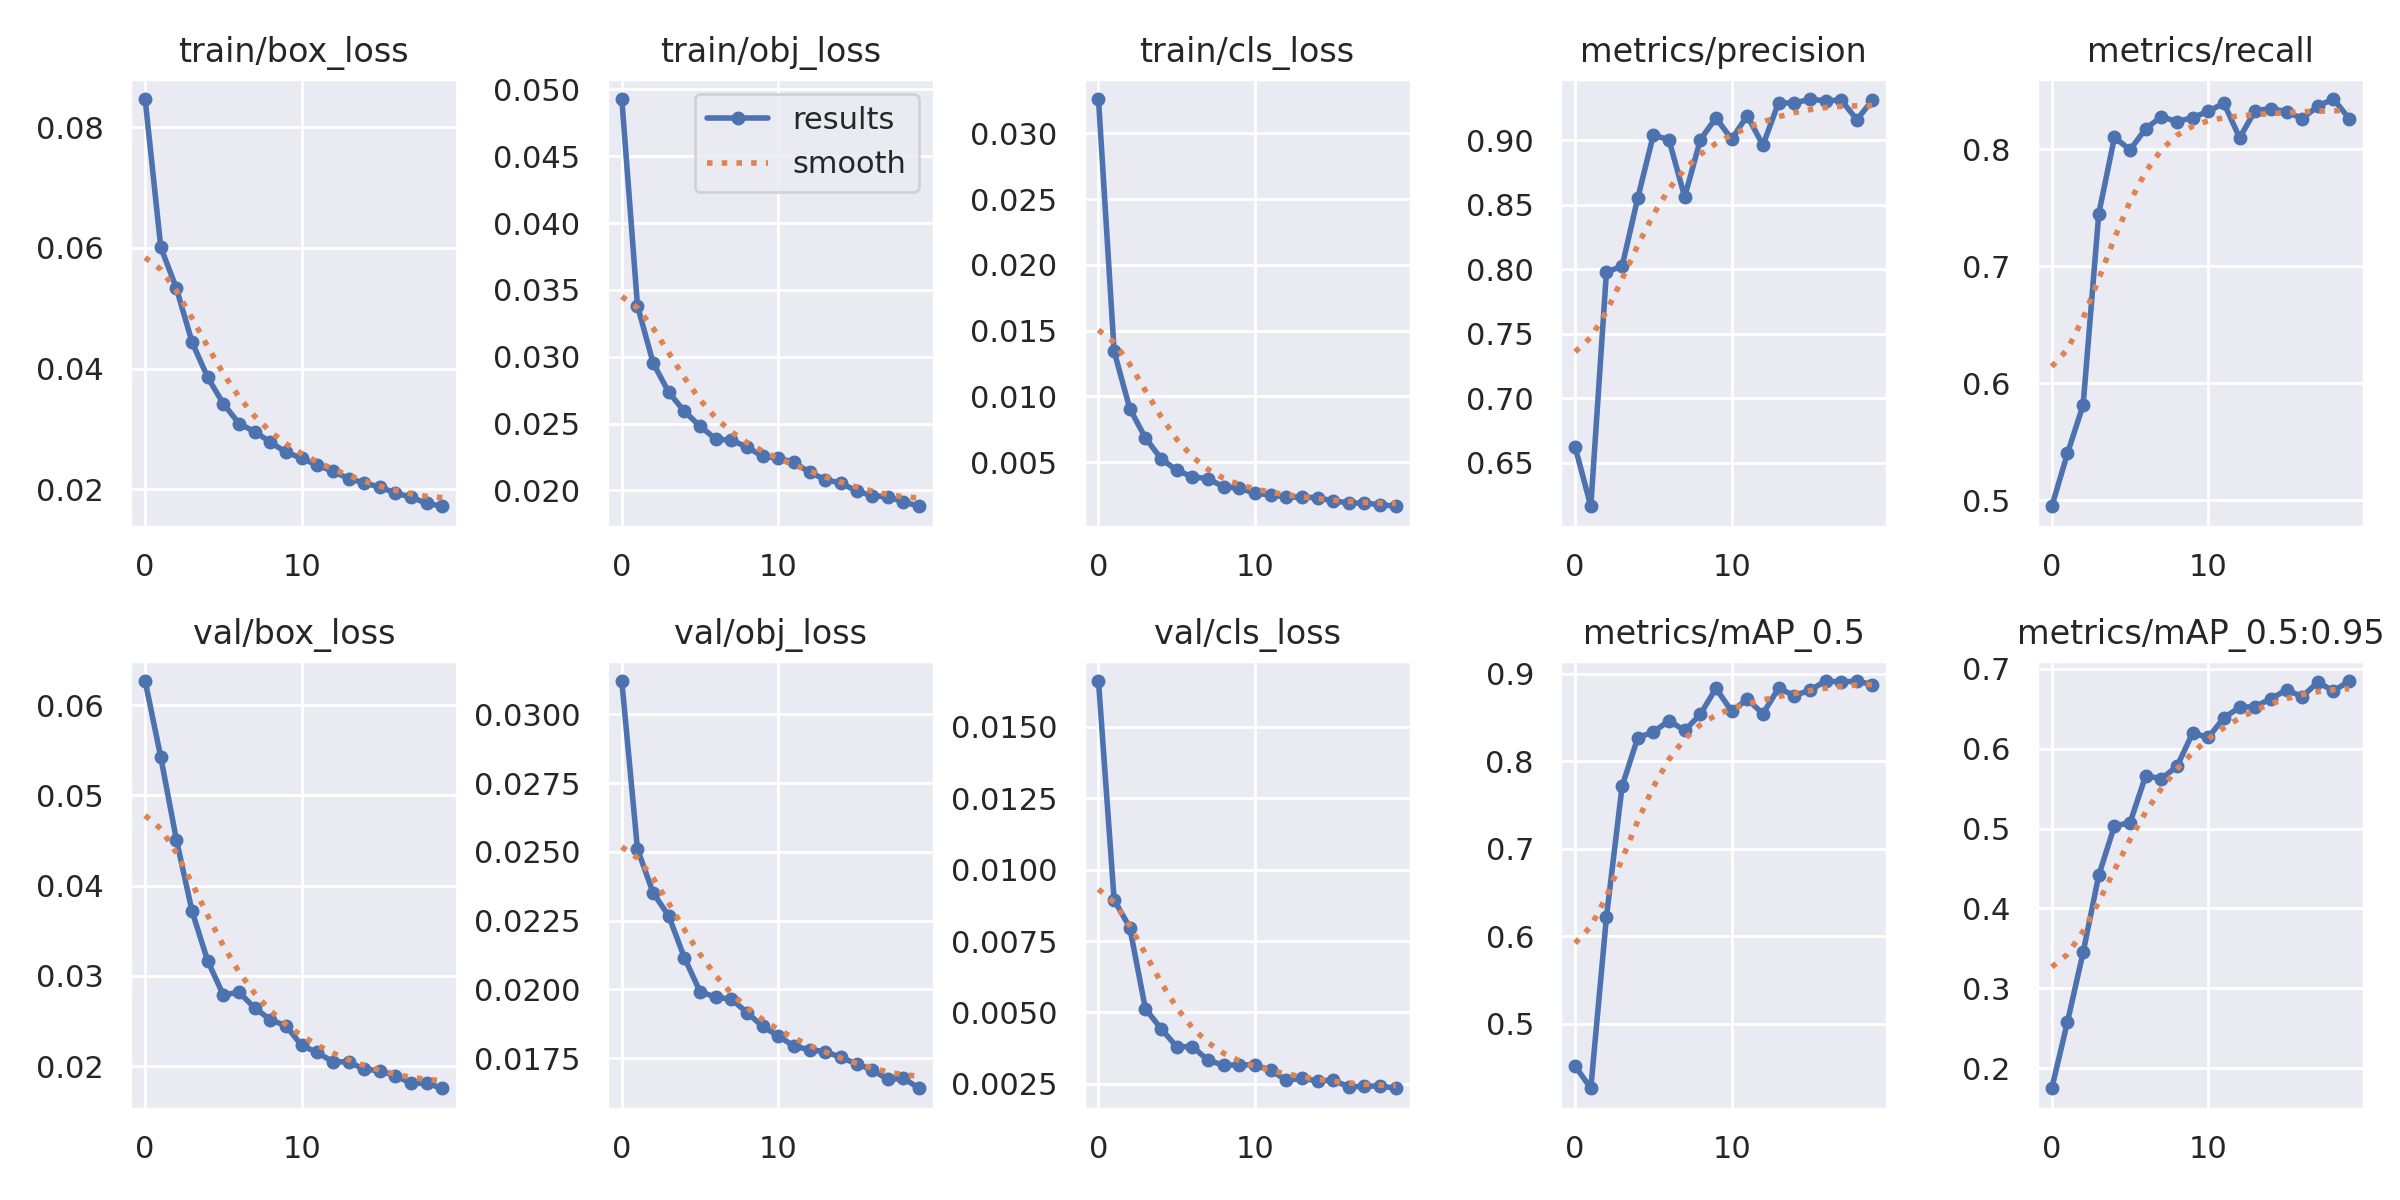

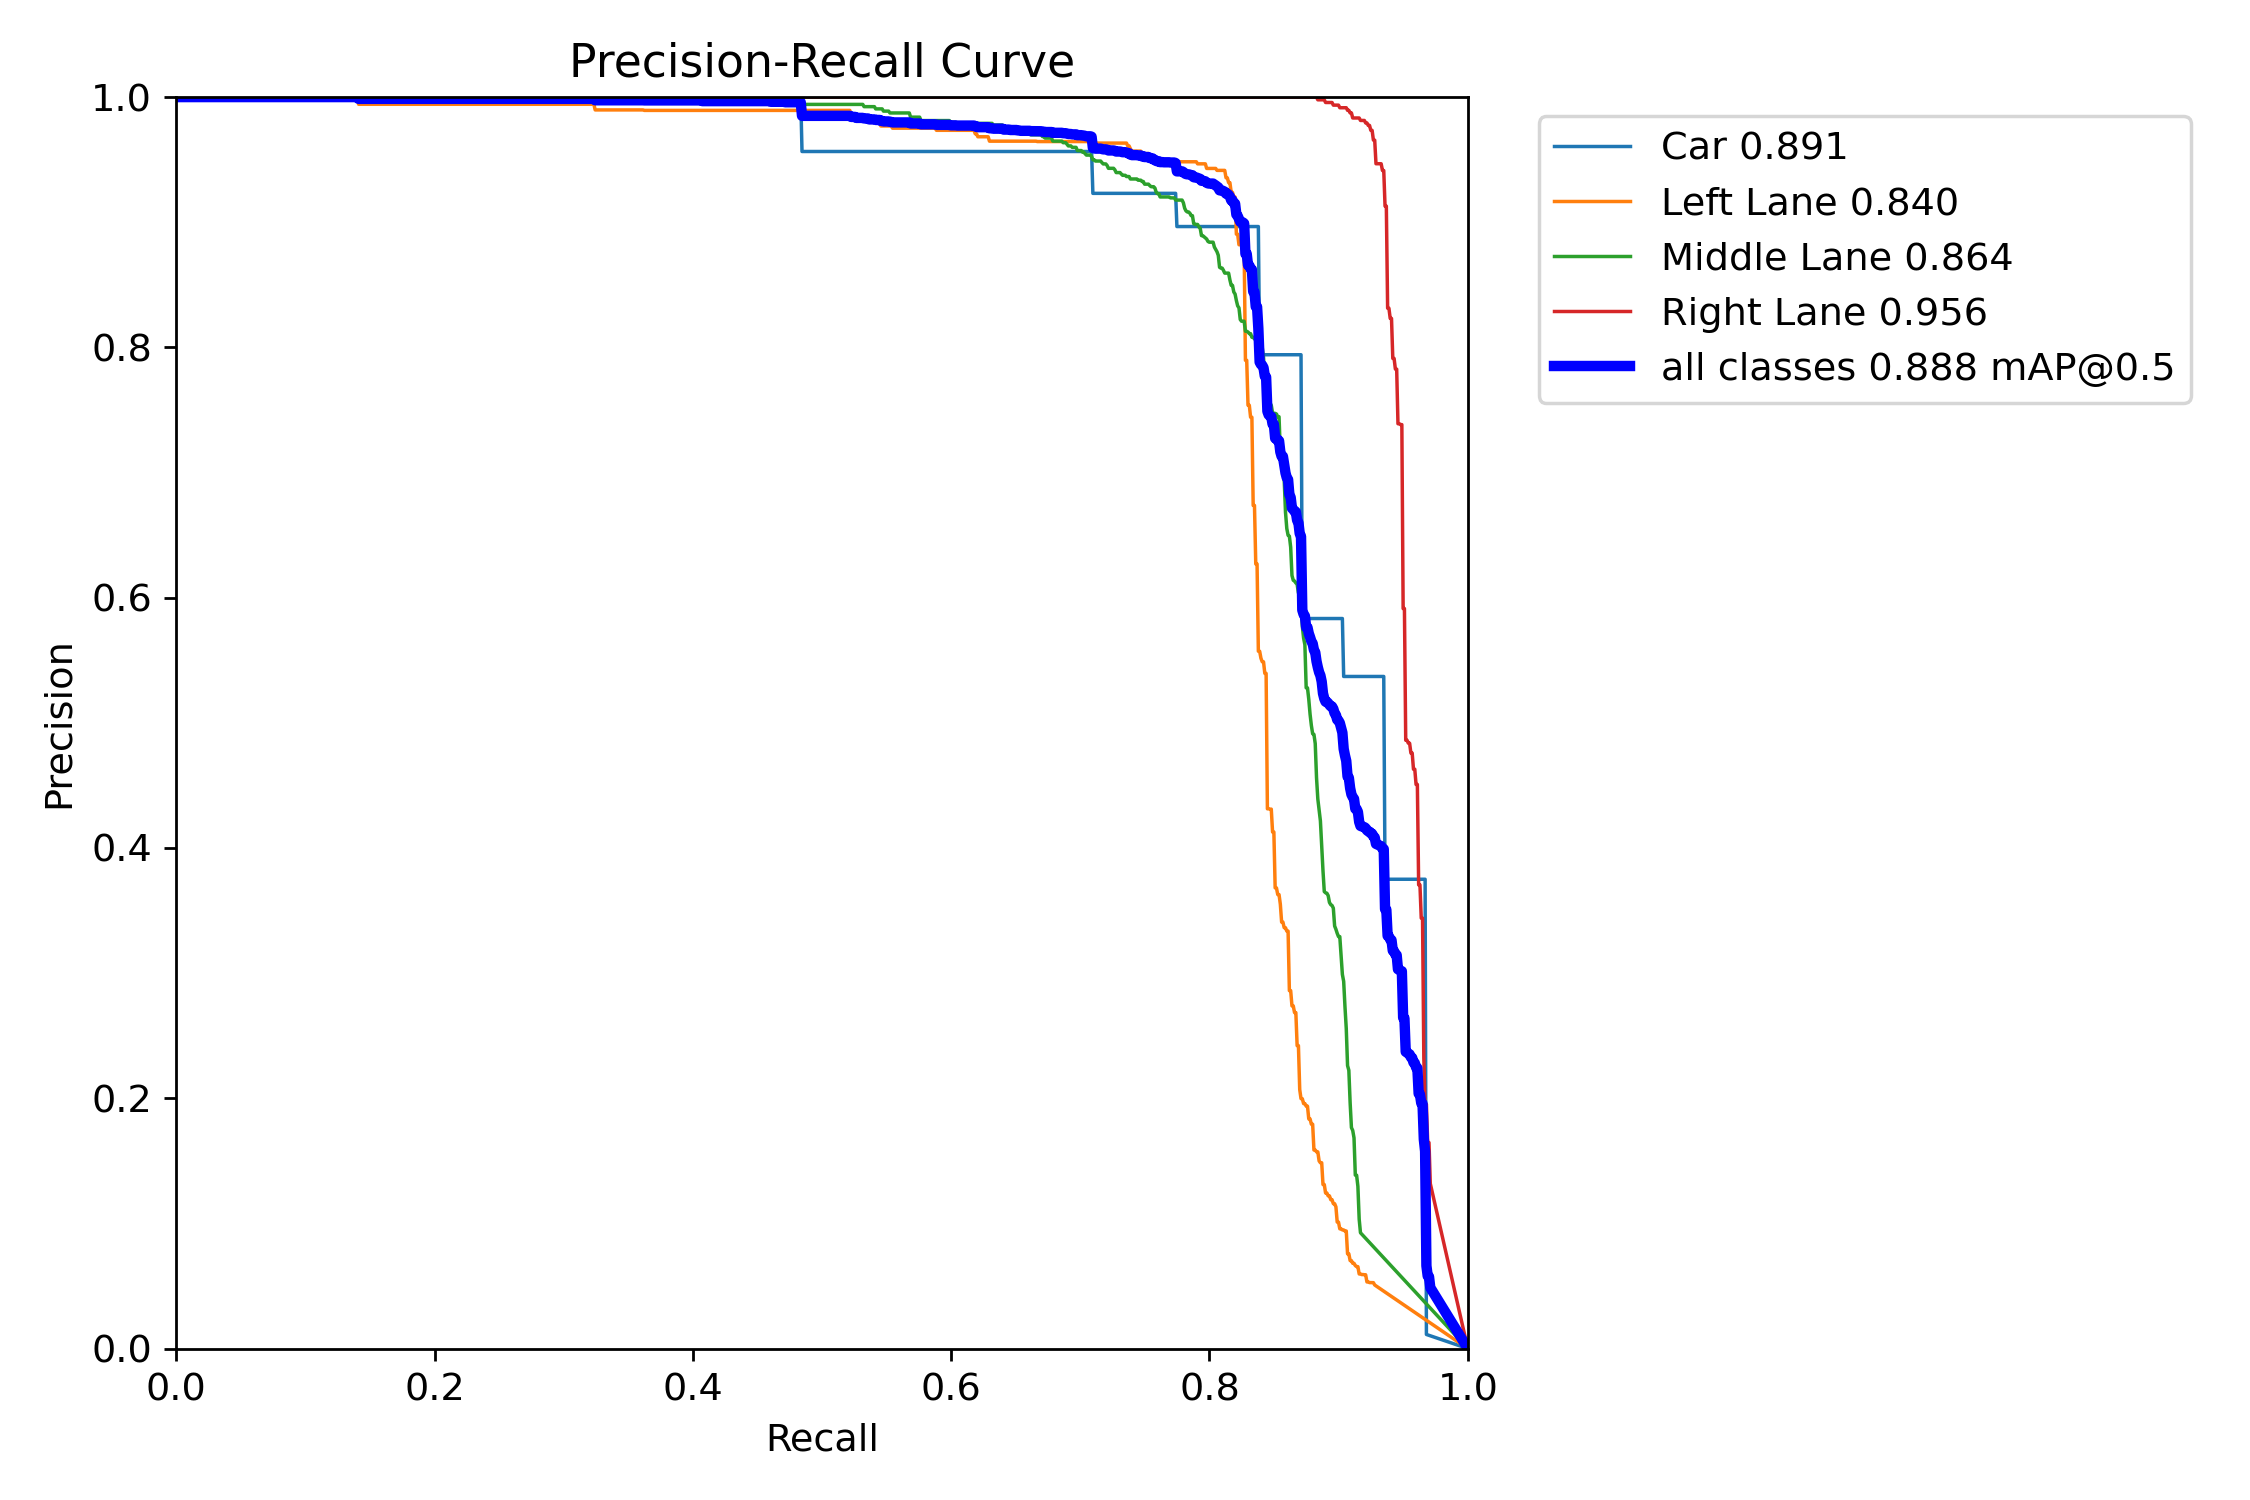

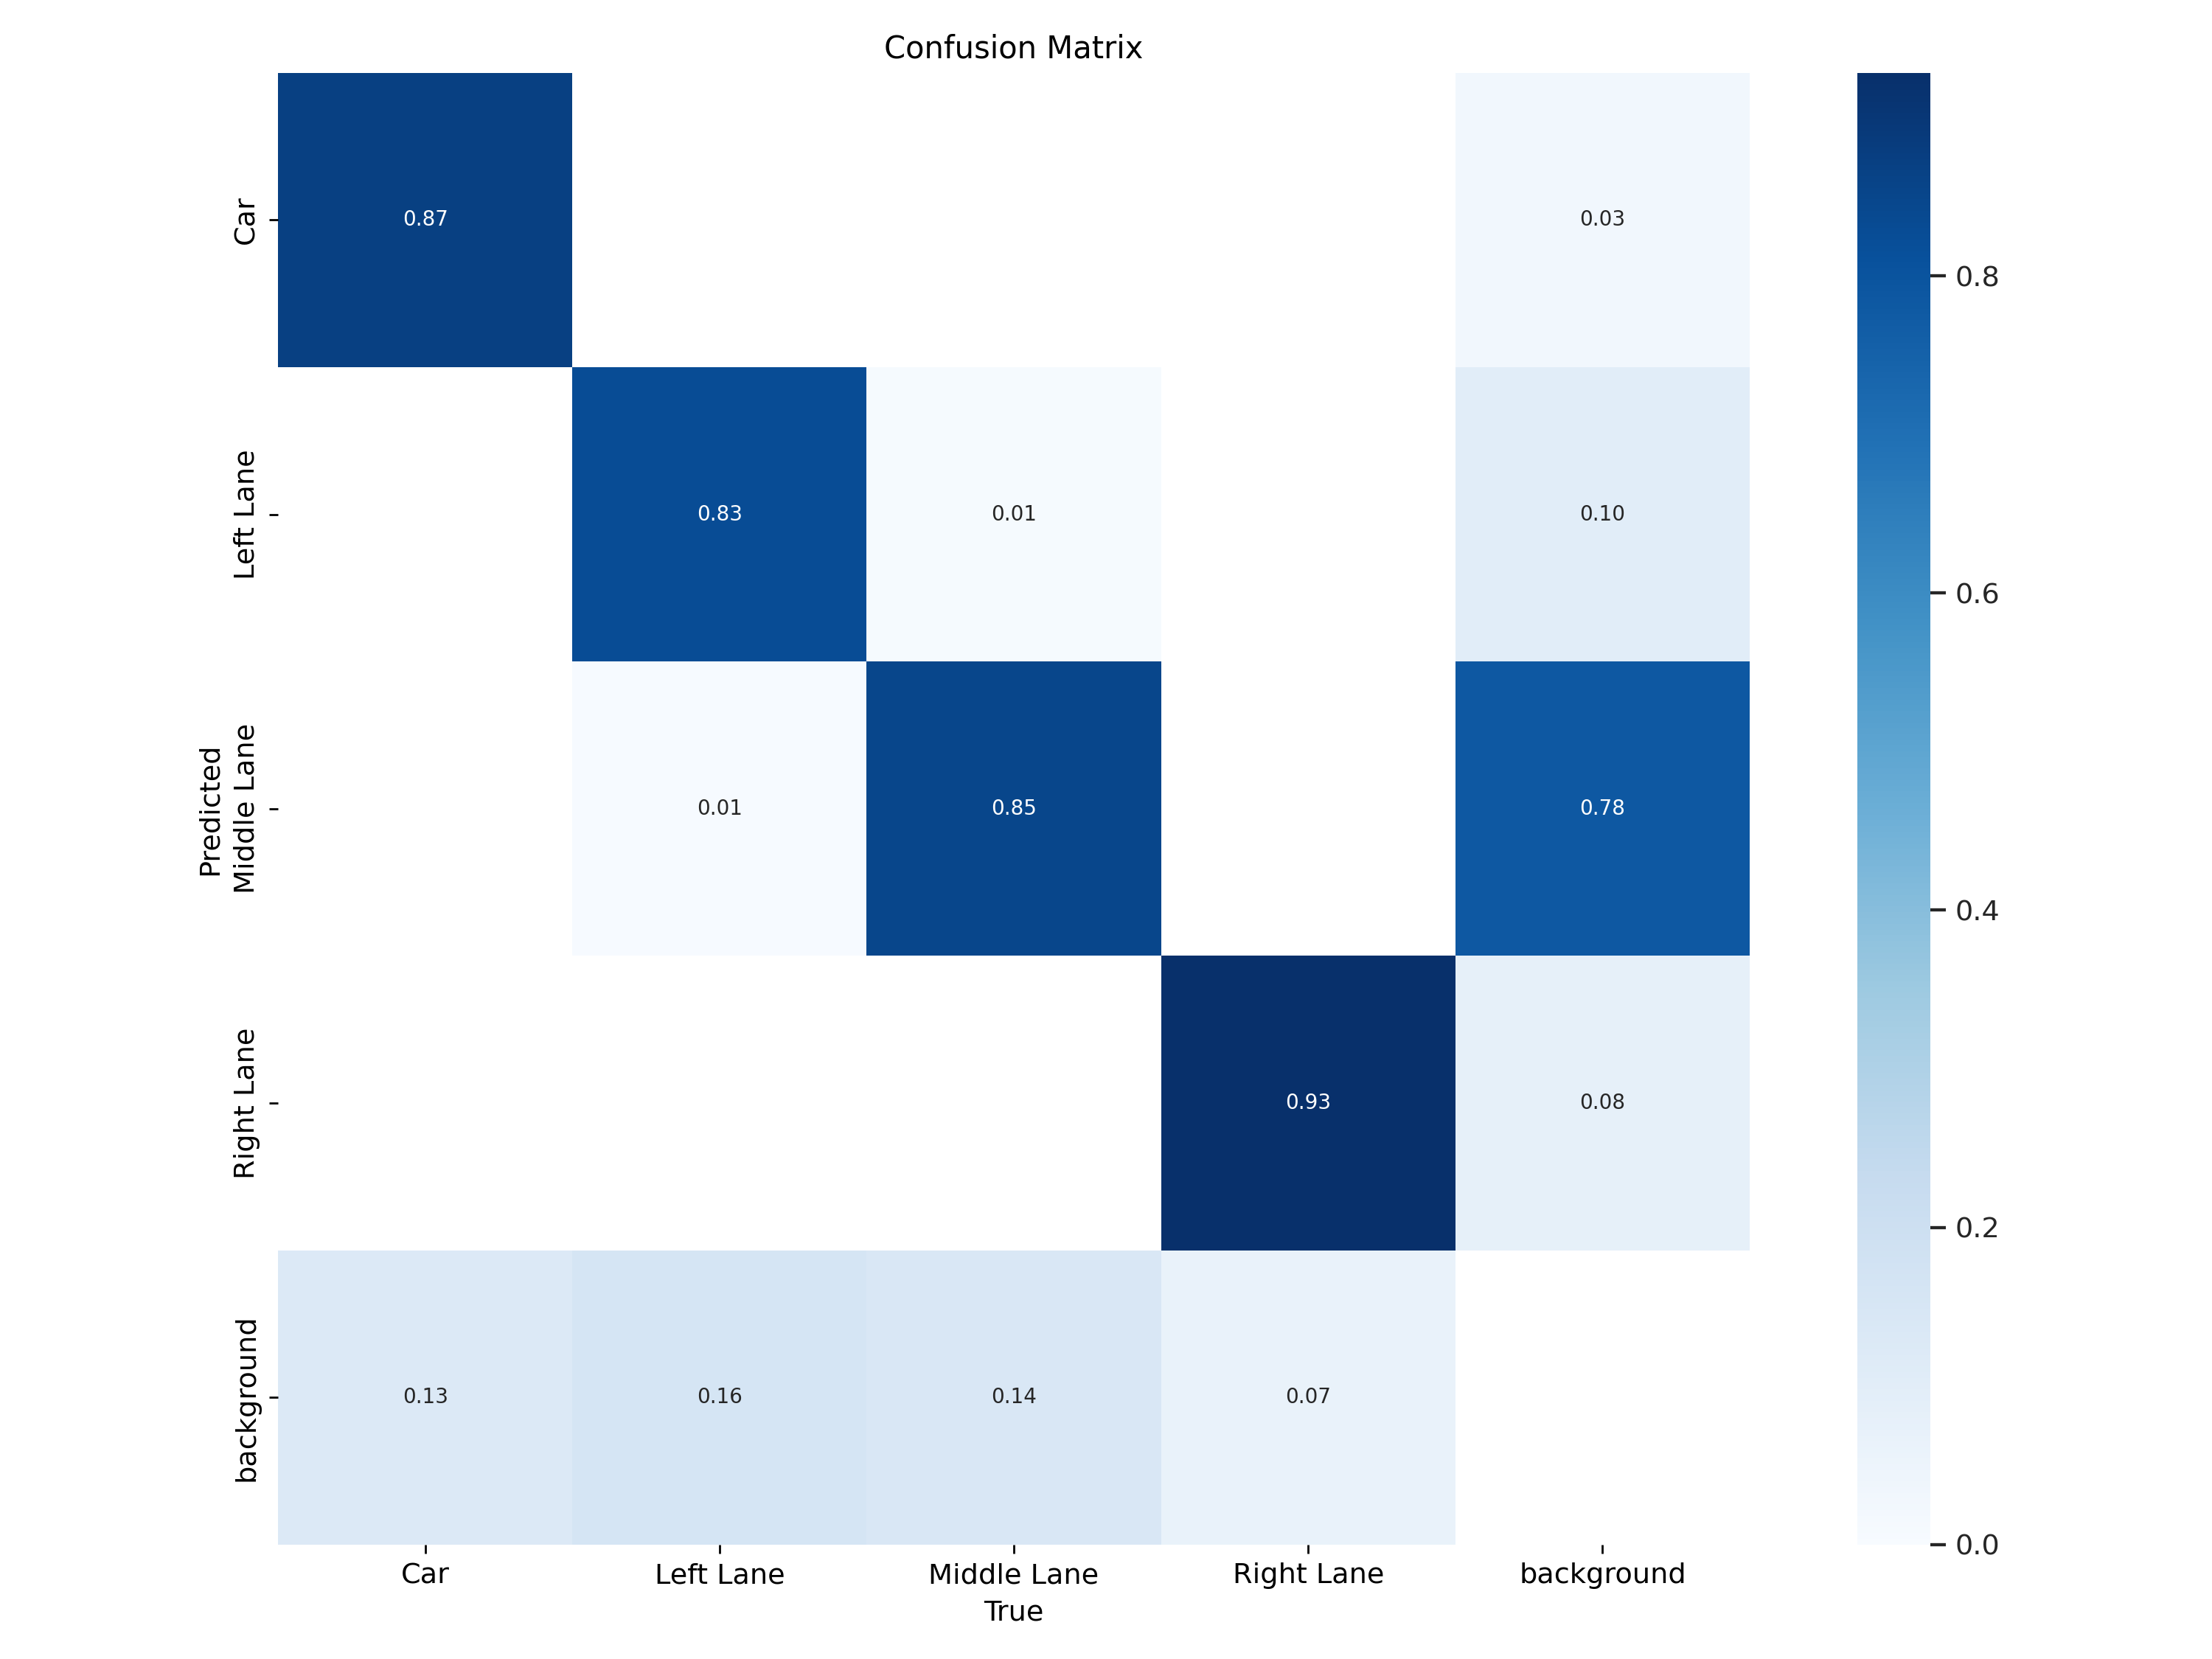

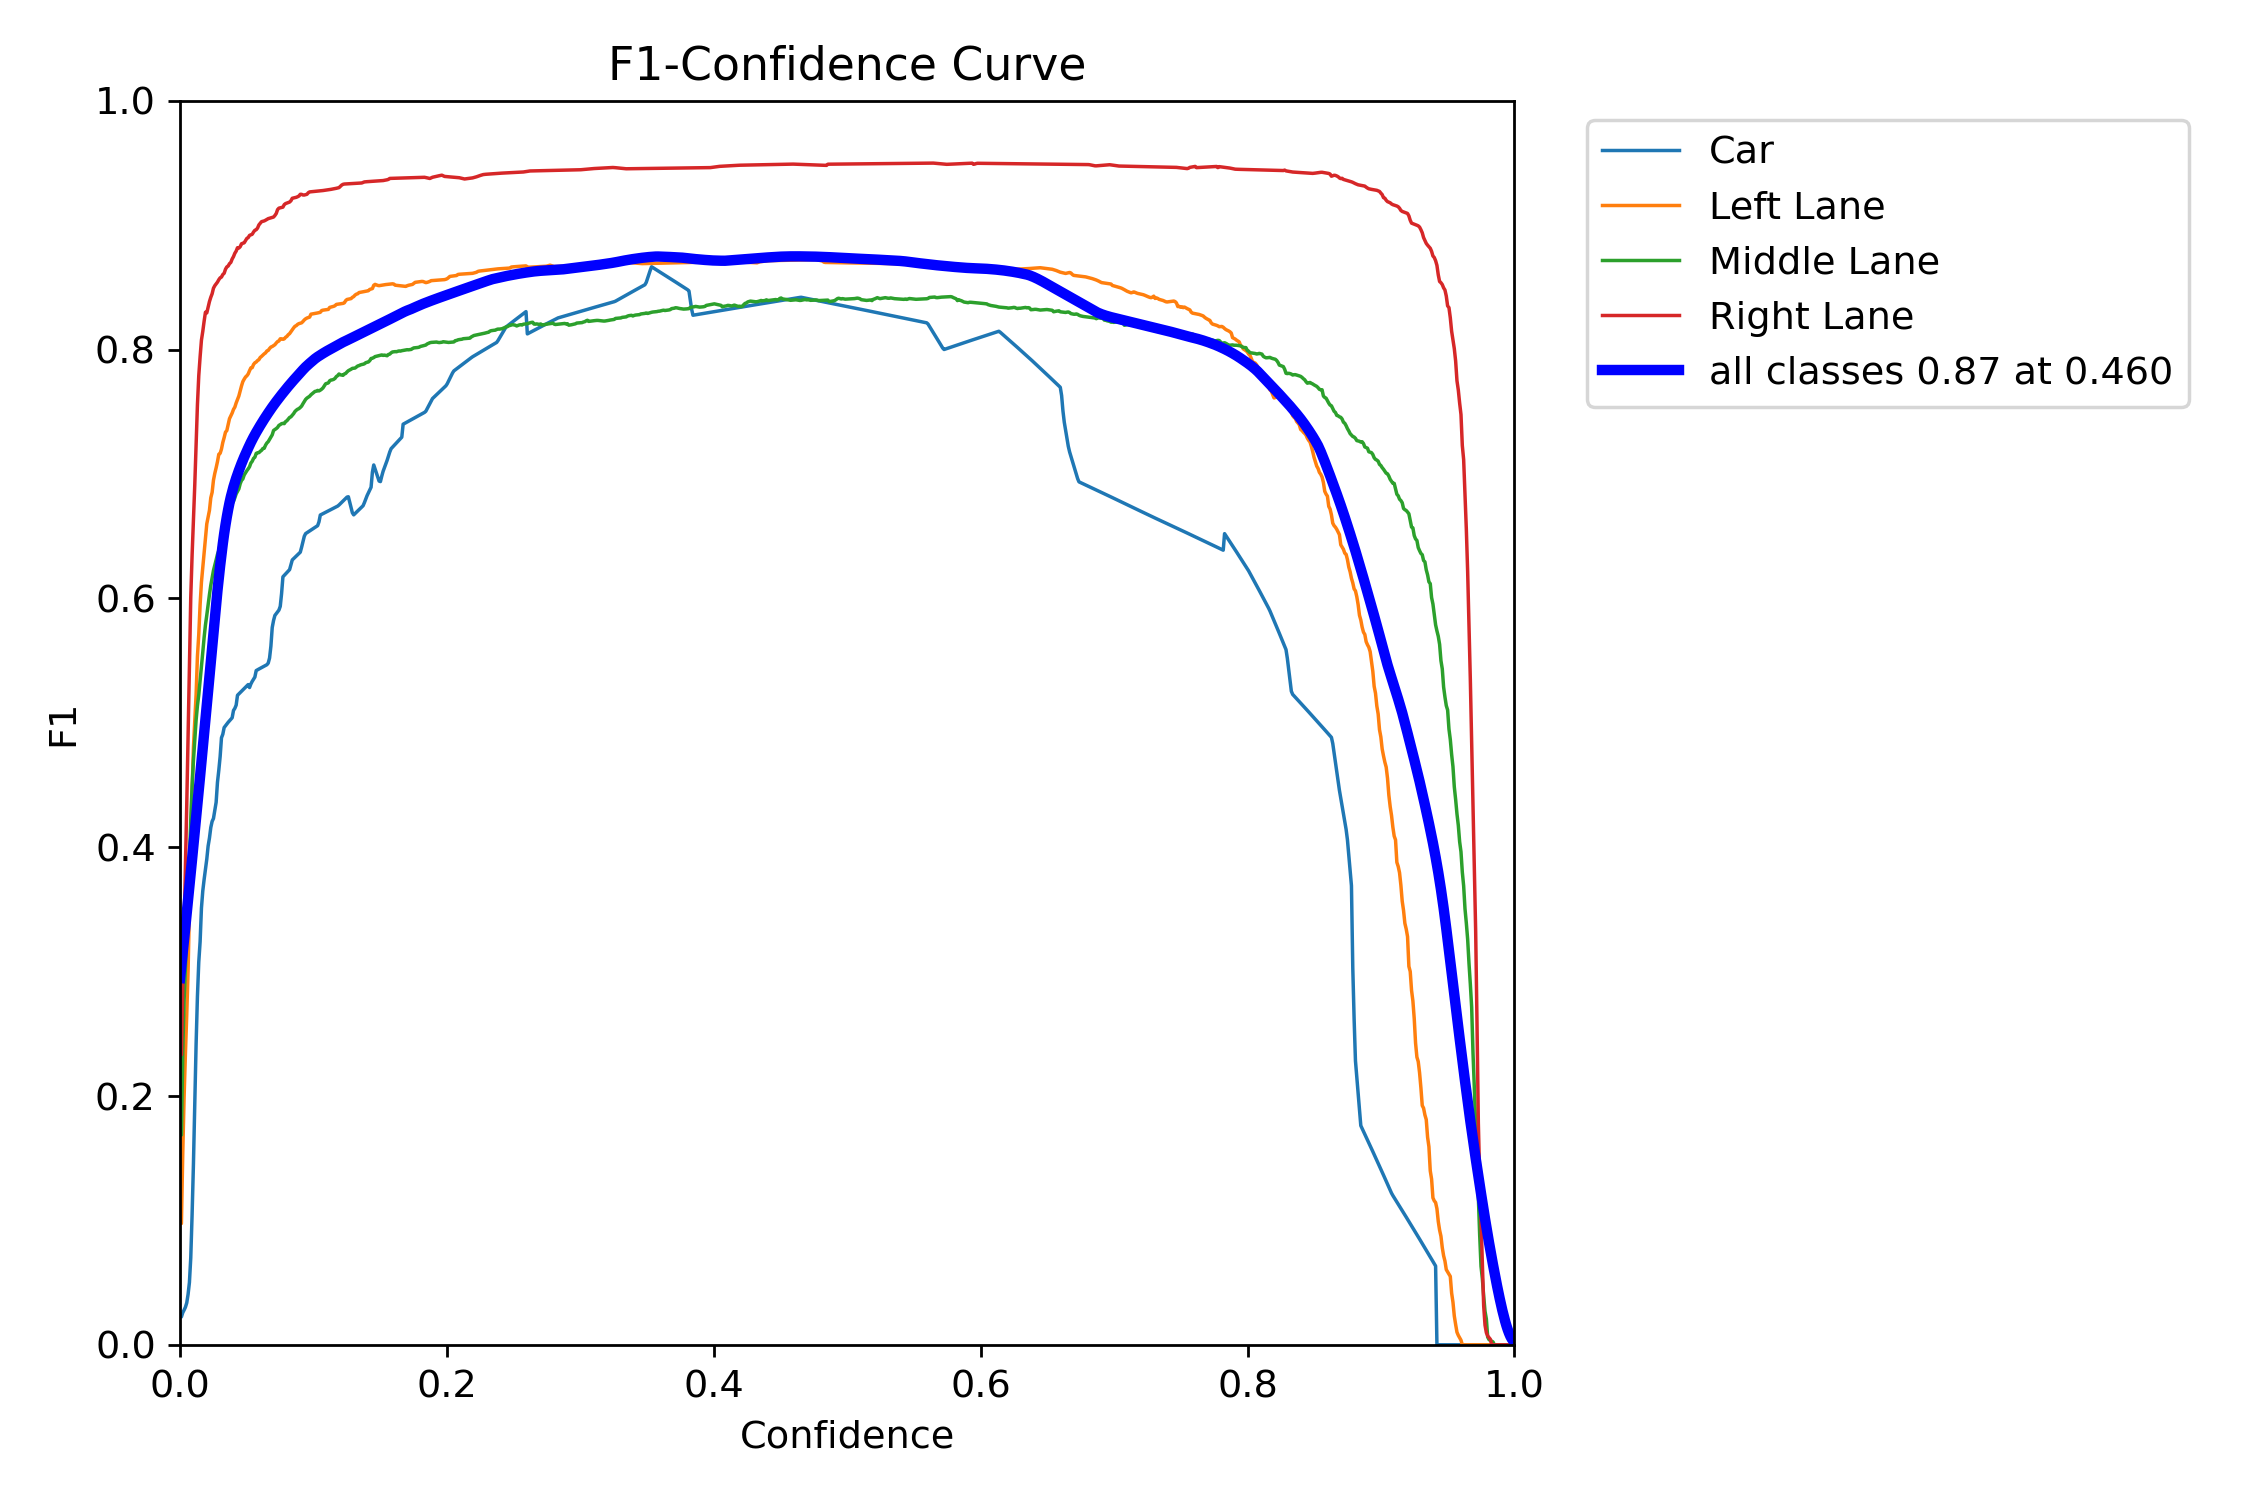

In [ ]:
from IPython.display import Image, display
import os

# Path to YOLOv3 results
results_dir = '/content/yolov5/runs/train/lane_detect_yolov52/'

plots = ['results.png', 'PR_curve.png', 'confusion_matrix.png', 'F1_curve.png']

print("Displaying YOLOv5 performance plots:")
for plot in plots:
    path = os.path.join(results_dir, plot)
    if os.path.exists(path):
        display(Image(filename=path))
    else:
        print(f"⚠ {plot} not found in {results_dir}")


In [ ]:
import pandas as pd
import os

# Path to results.csv file
csv_path = os.path.join(results_dir, 'results.csv')

# Load and inspect the CSV file
if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)

    print("🧾 Available columns in results.csv:")
    print(df.columns.tolist())  # Show all column names

    # Show the last few rows
    print("\n🔍 Preview of last few rows:")
    print(df.tail())
else:
    print("⚠ 'results.csv' not found in:", results_dir)


🧾 Available columns in results.csv:
['               epoch', '      train/box_loss', '      train/obj_loss', '      train/cls_loss', '   metrics/precision', '      metrics/recall', '     metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', '        val/box_loss', '        val/obj_loss', '        val/cls_loss', '               x/lr0', '               x/lr1', '               x/lr2']

🔍 Preview of last few rows:
                   epoch        train/box_loss        train/obj_loss  \
15                    15              0.020302              0.019969   
16                    16              0.019351              0.019606   
17                    17              0.018637              0.019527   
18                    18              0.017622              0.019151   
19                    19              0.017143              0.018821   

          train/cls_loss     metrics/precision        metrics/recall  \
15              0.002039               0.93207               0.83238   
16              0.001

In [ ]:
import pandas as pd
import os

# Path to results.csv
csv_path = os.path.join(results_dir, 'results.csv')

if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)

    # Clean column names (remove extra spaces)
    df.columns = df.columns.str.strip()

    # Get final epoch results
    final = df.iloc[-1]

    # Extract metrics
    precision = final['metrics/precision']
    recall = final['metrics/recall']
    map_50 = final['metrics/mAP_0.5']
    map_50_95 = final['metrics/mAP_0.5:0.95']
    train_loss = final['train/box_loss']
    val_loss = final['val/box_loss']

    # Estimate accuracy as mean of precision and recall
    estimated_accuracy = (precision + recall) / 2

    # 📊 Display results
    print("📈 YOLOv5 Final Evaluation Metrics (Last Epoch):")
    print(f"🔹 Precision:       {precision:.4f}")
    print(f"🔹 Recall:          {recall:.4f}")
    print(f"🔹 mAP@0.5:         {map_50:.4f}")
    print(f"🔹 mAP@0.5:0.95:    {map_50_95:.4f}")
    print(f"🔹 Training Box Loss:   {train_loss:.4f}")
    print(f"🔹 Validation Box Loss: {val_loss:.4f}")
    print(f"✅ Estimated Accuracy:  {estimated_accuracy:.4f}")

else:
    print("⚠ 'results.csv' not found in:", results_dir)


📈 YOLOv5 Final Evaluation Metrics (Last Epoch):
🔹 Precision:       0.9313
🔹 Recall:          0.8264
🔹 mAP@0.5:         0.8879
🔹 mAP@0.5:0.95:    0.6846
🔹 Training Box Loss:   0.0171
🔹 Validation Box Loss: 0.0176
✅ Estimated Accuracy:  0.8788


In [ ]:
from IPython.display import Image, display

display(Image(filename='runs/val/exp/confusion_matrix.png', width=800))


FileNotFoundError: [Errno 2] No such file or directory: 'runs/val/exp/confusion_matrix.png'

In [ ]:
!ls /content/yolov5/Lane-Detection-4
!unzip /content/yolov5/Lane-Detection-4/roboflow.zip -d /content/yolov5/Lane-Detection-4/



roboflow.zip
Archive:  /content/yolov5/Lane-Detection-4/roboflow.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/yolov5/Lane-Detection-4/roboflow.zip or
        /content/yolov5/Lane-Detection-4/roboflow.zip.zip, and cannot find /content/yolov5/Lane-Detection-4/roboflow.zip.ZIP, period.


In [ ]:
!unzip /content/yolov5/Lane-Detection-4/roboflow.zip -d /content/yolov5/Lane-Detection-4/
!python train.py \
  --img 640 \
  --batch 16 \
  --epochs 15 \
  --data /content/yolov5/Lane-Detection-4/data.yaml \
  --weights yolov3.pt \
  --name lane_detect_yolov3 \
  --cache


unzip:  cannot find or open /content/yolov5/Lane-Detection-4/roboflow.zip, /content/yolov5/Lane-Detection-4/roboflow.zip.zip or /content/yolov5/Lane-Detection-4/roboflow.zip.ZIP.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-07-28 05:27:17.106719: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753680437.129439   11494 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753680437.136339   11494 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize

In [ ]:
import os

results_dir = '/content/yolov5/runs/train/lane_detect_yolov3/'
print("Files in results folder:", os.listdir(results_dir))


Files in results folder: ['F1_curve.png', 'train_batch1.jpg', 'P_curve.png', 'labels_correlogram.jpg', 'train_batch2.jpg', 'labels.jpg', 'opt.yaml', 'R_curve.png', 'val_batch0_pred.jpg', 'results.png', 'hyp.yaml', 'val_batch1_pred.jpg', 'val_batch2_labels.jpg', 'results.csv', 'events.out.tfevents.1753680442.a8eecd613049.11494.0', 'PR_curve.png', 'confusion_matrix.png', 'val_batch2_pred.jpg', 'weights', 'val_batch1_labels.jpg', 'train_batch0.jpg', 'val_batch0_labels.jpg']


Displaying YOLOv3 performance plots:


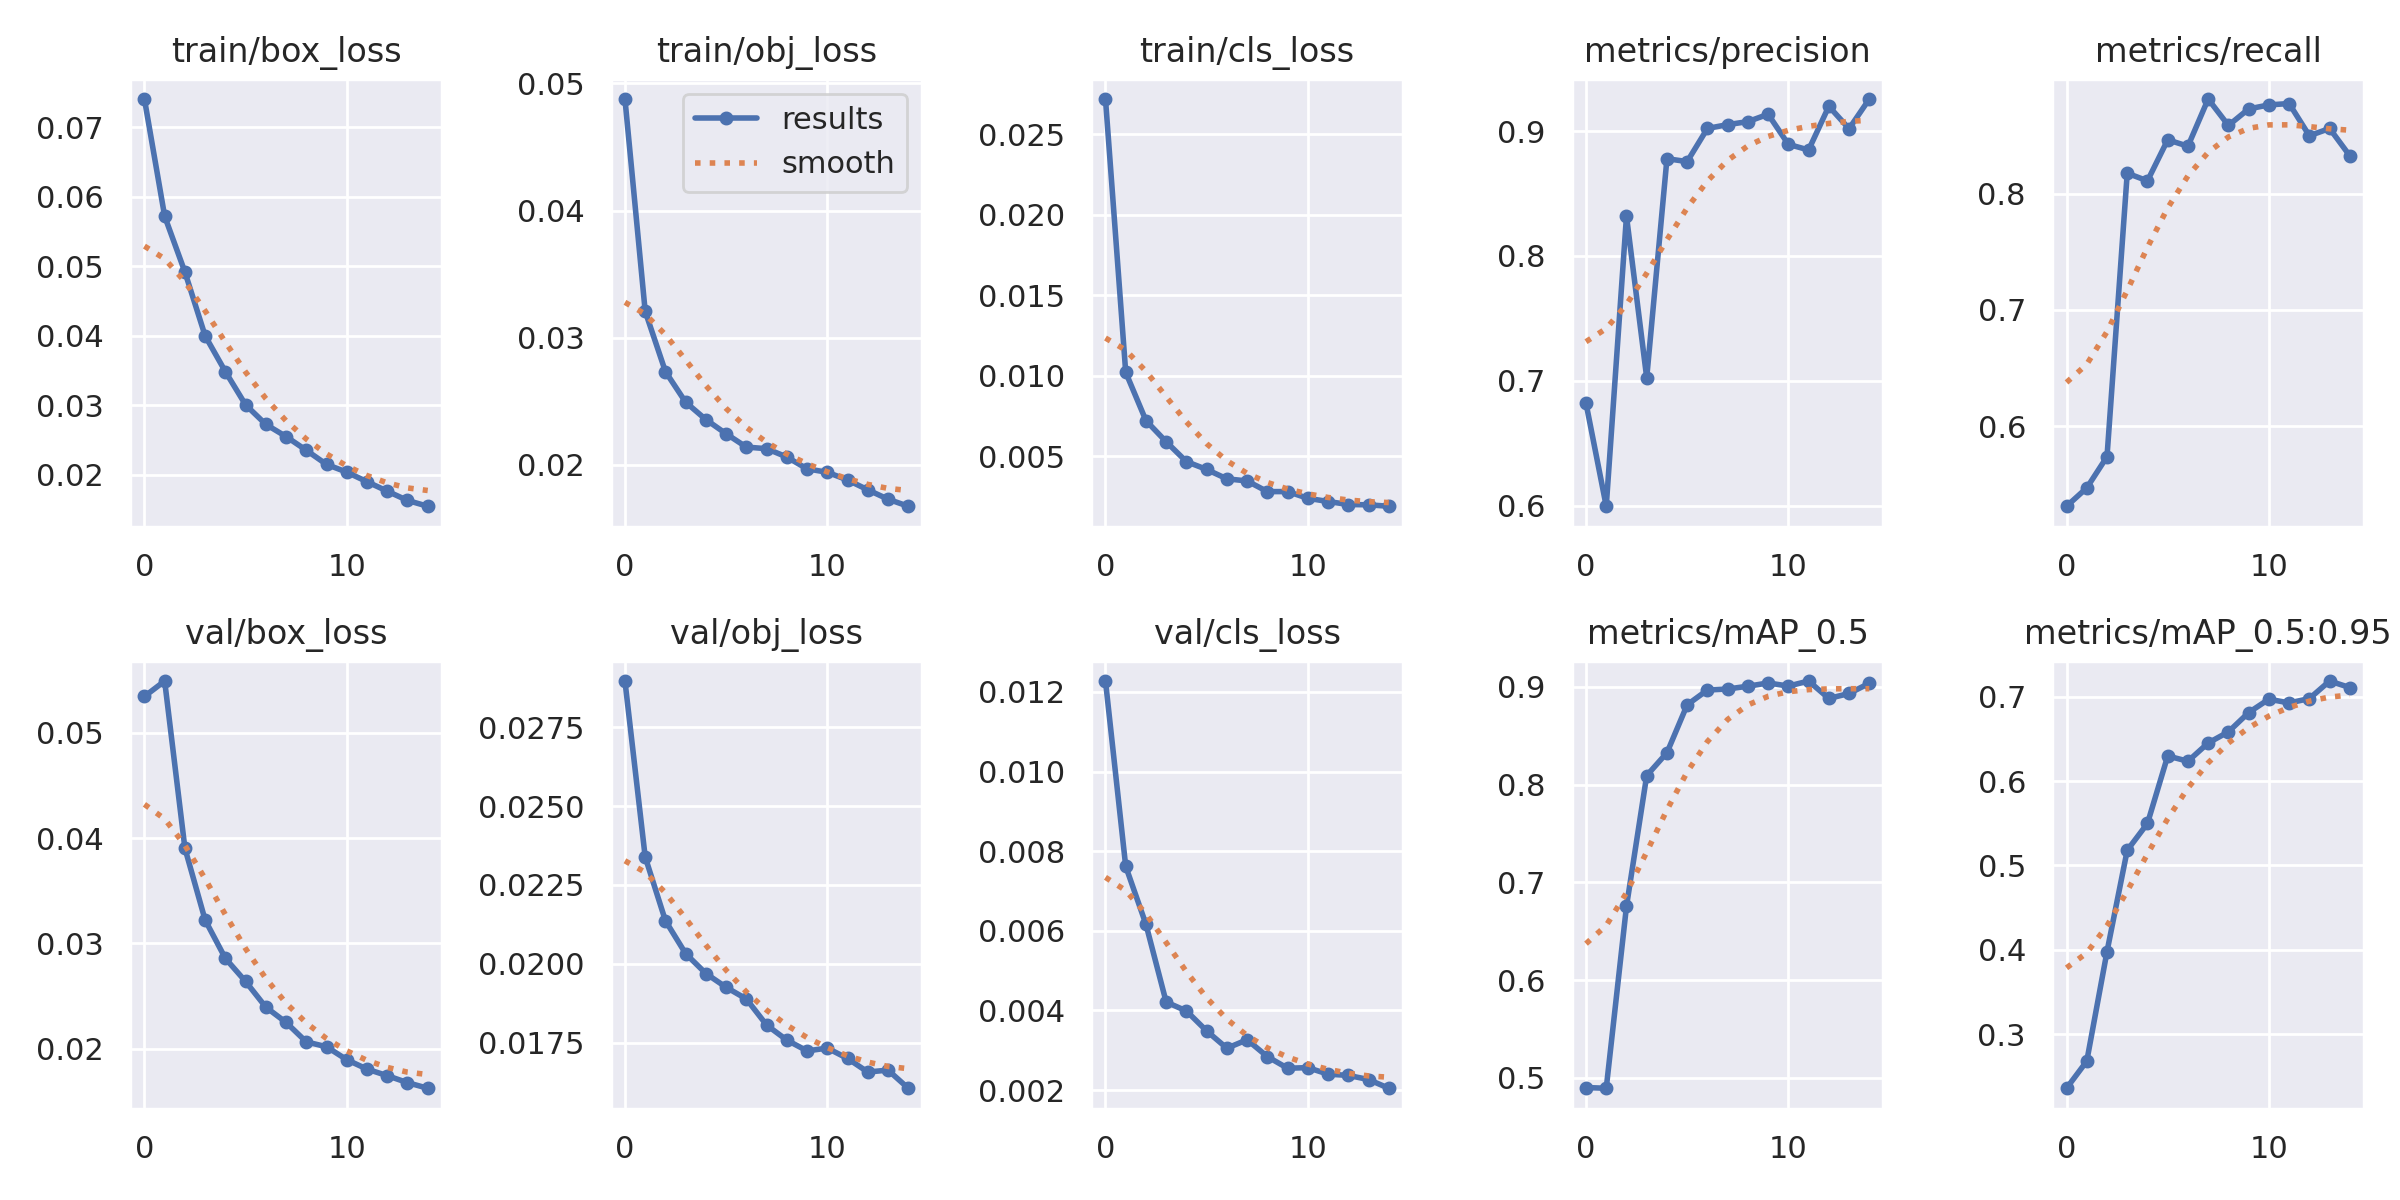

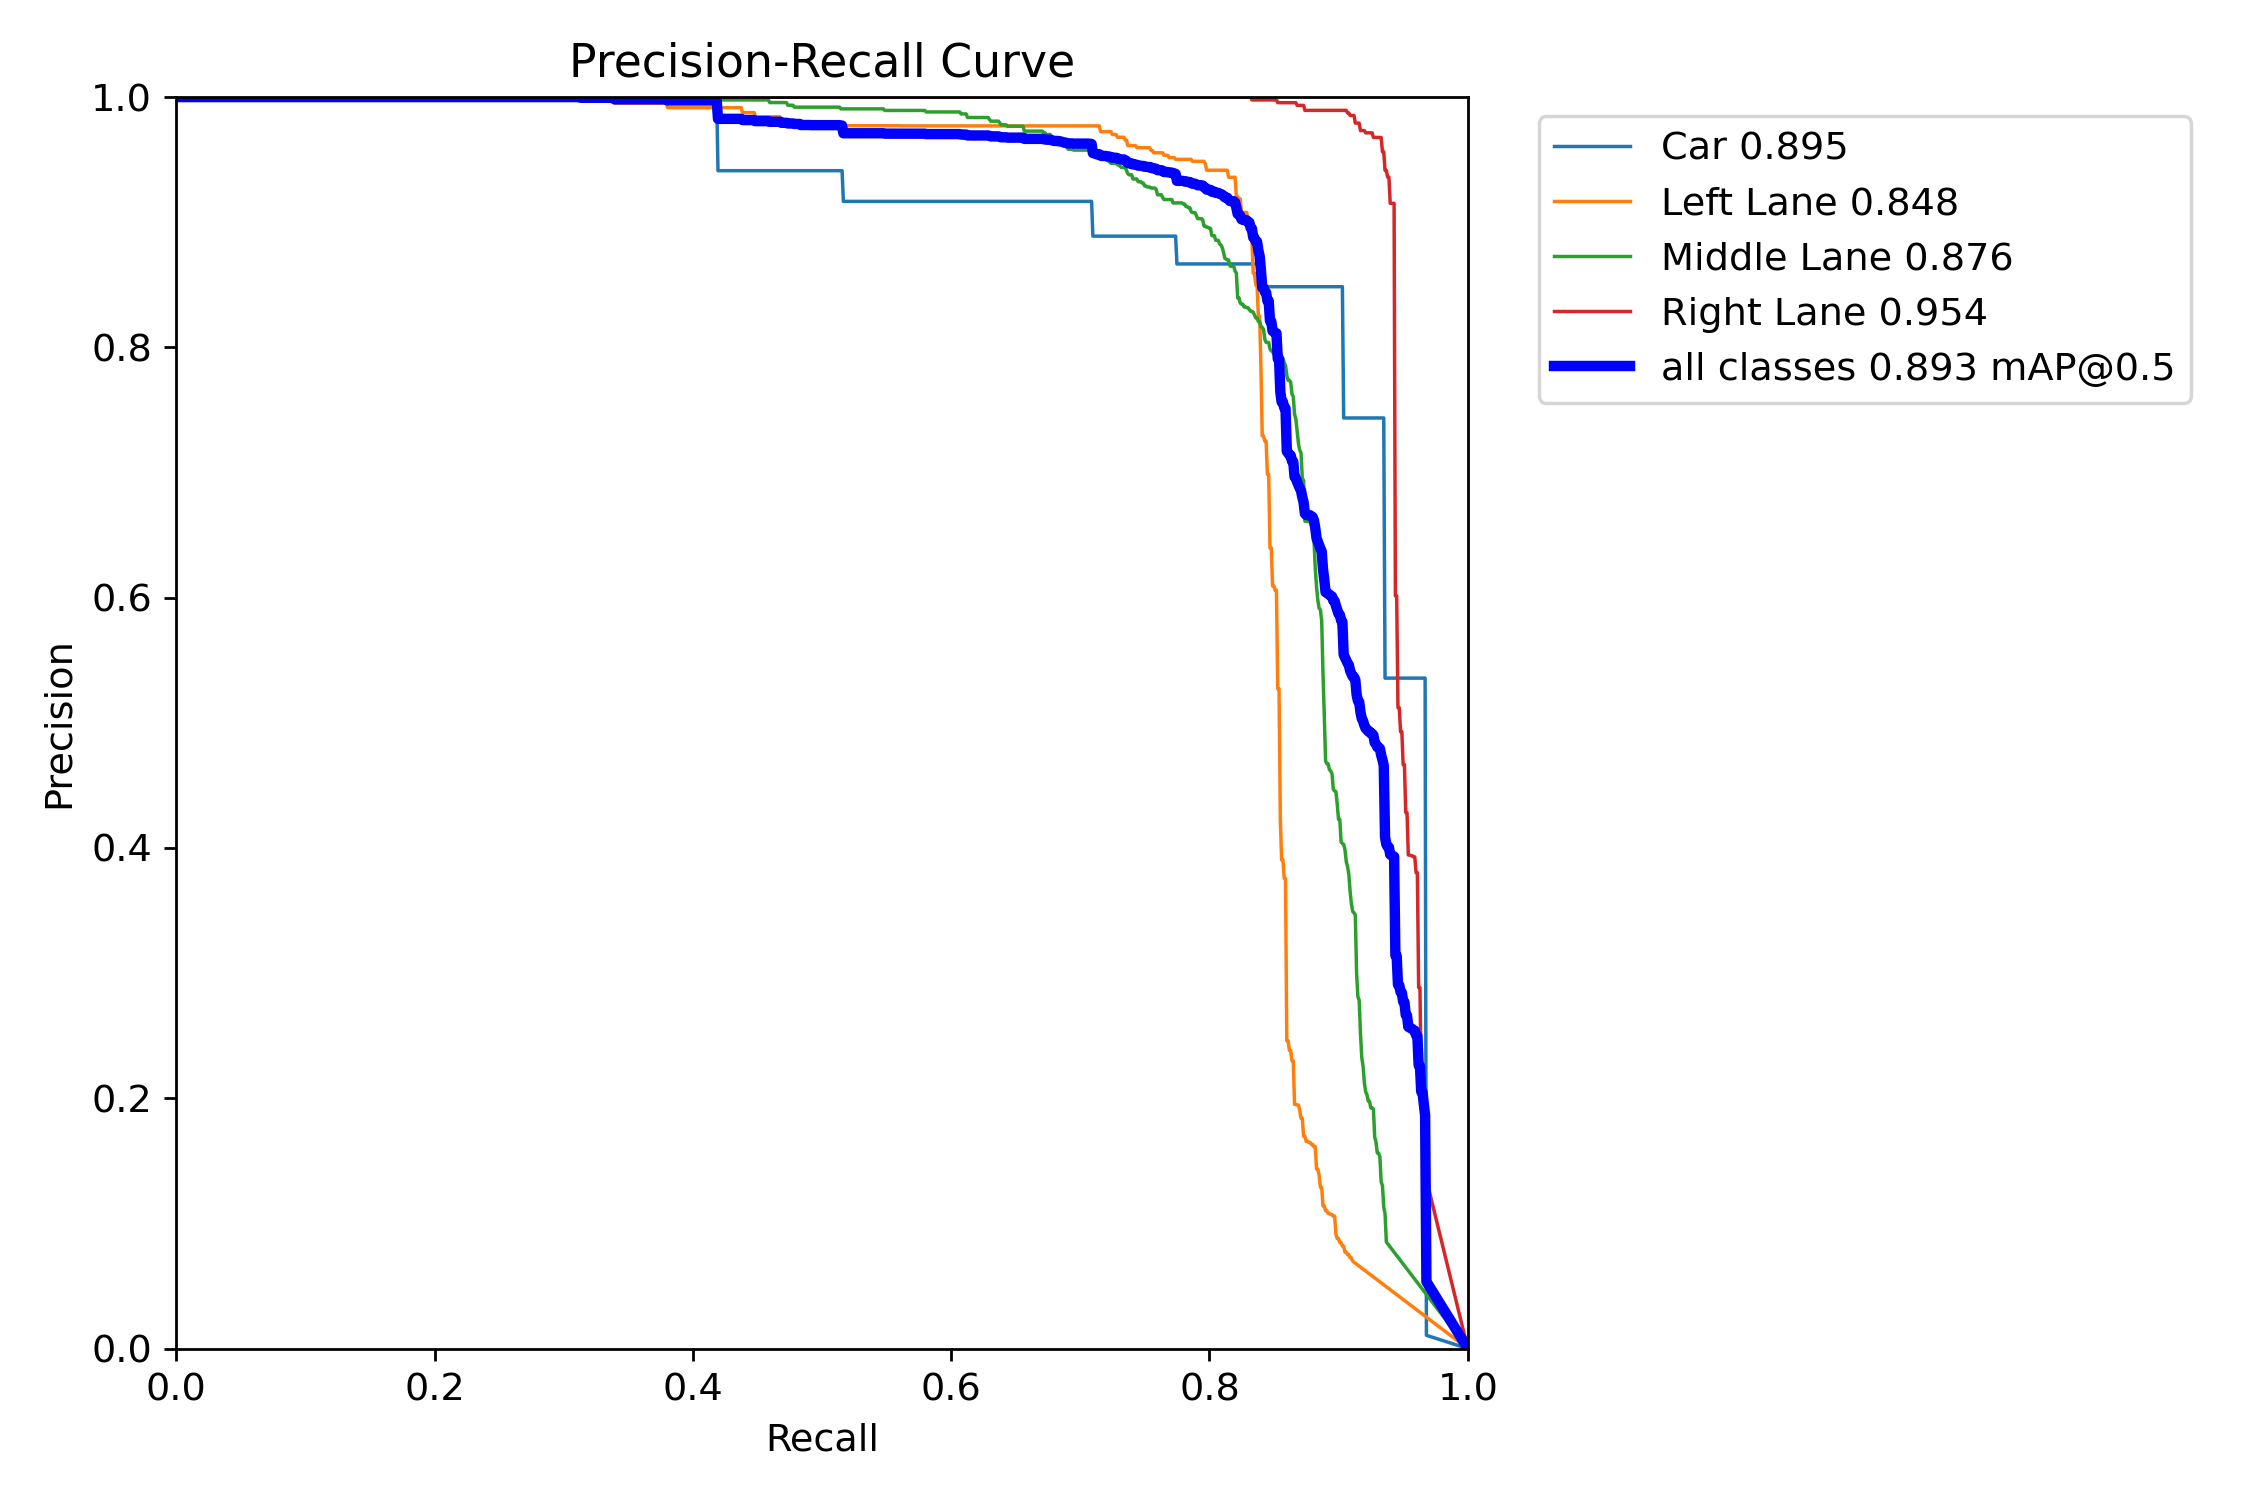

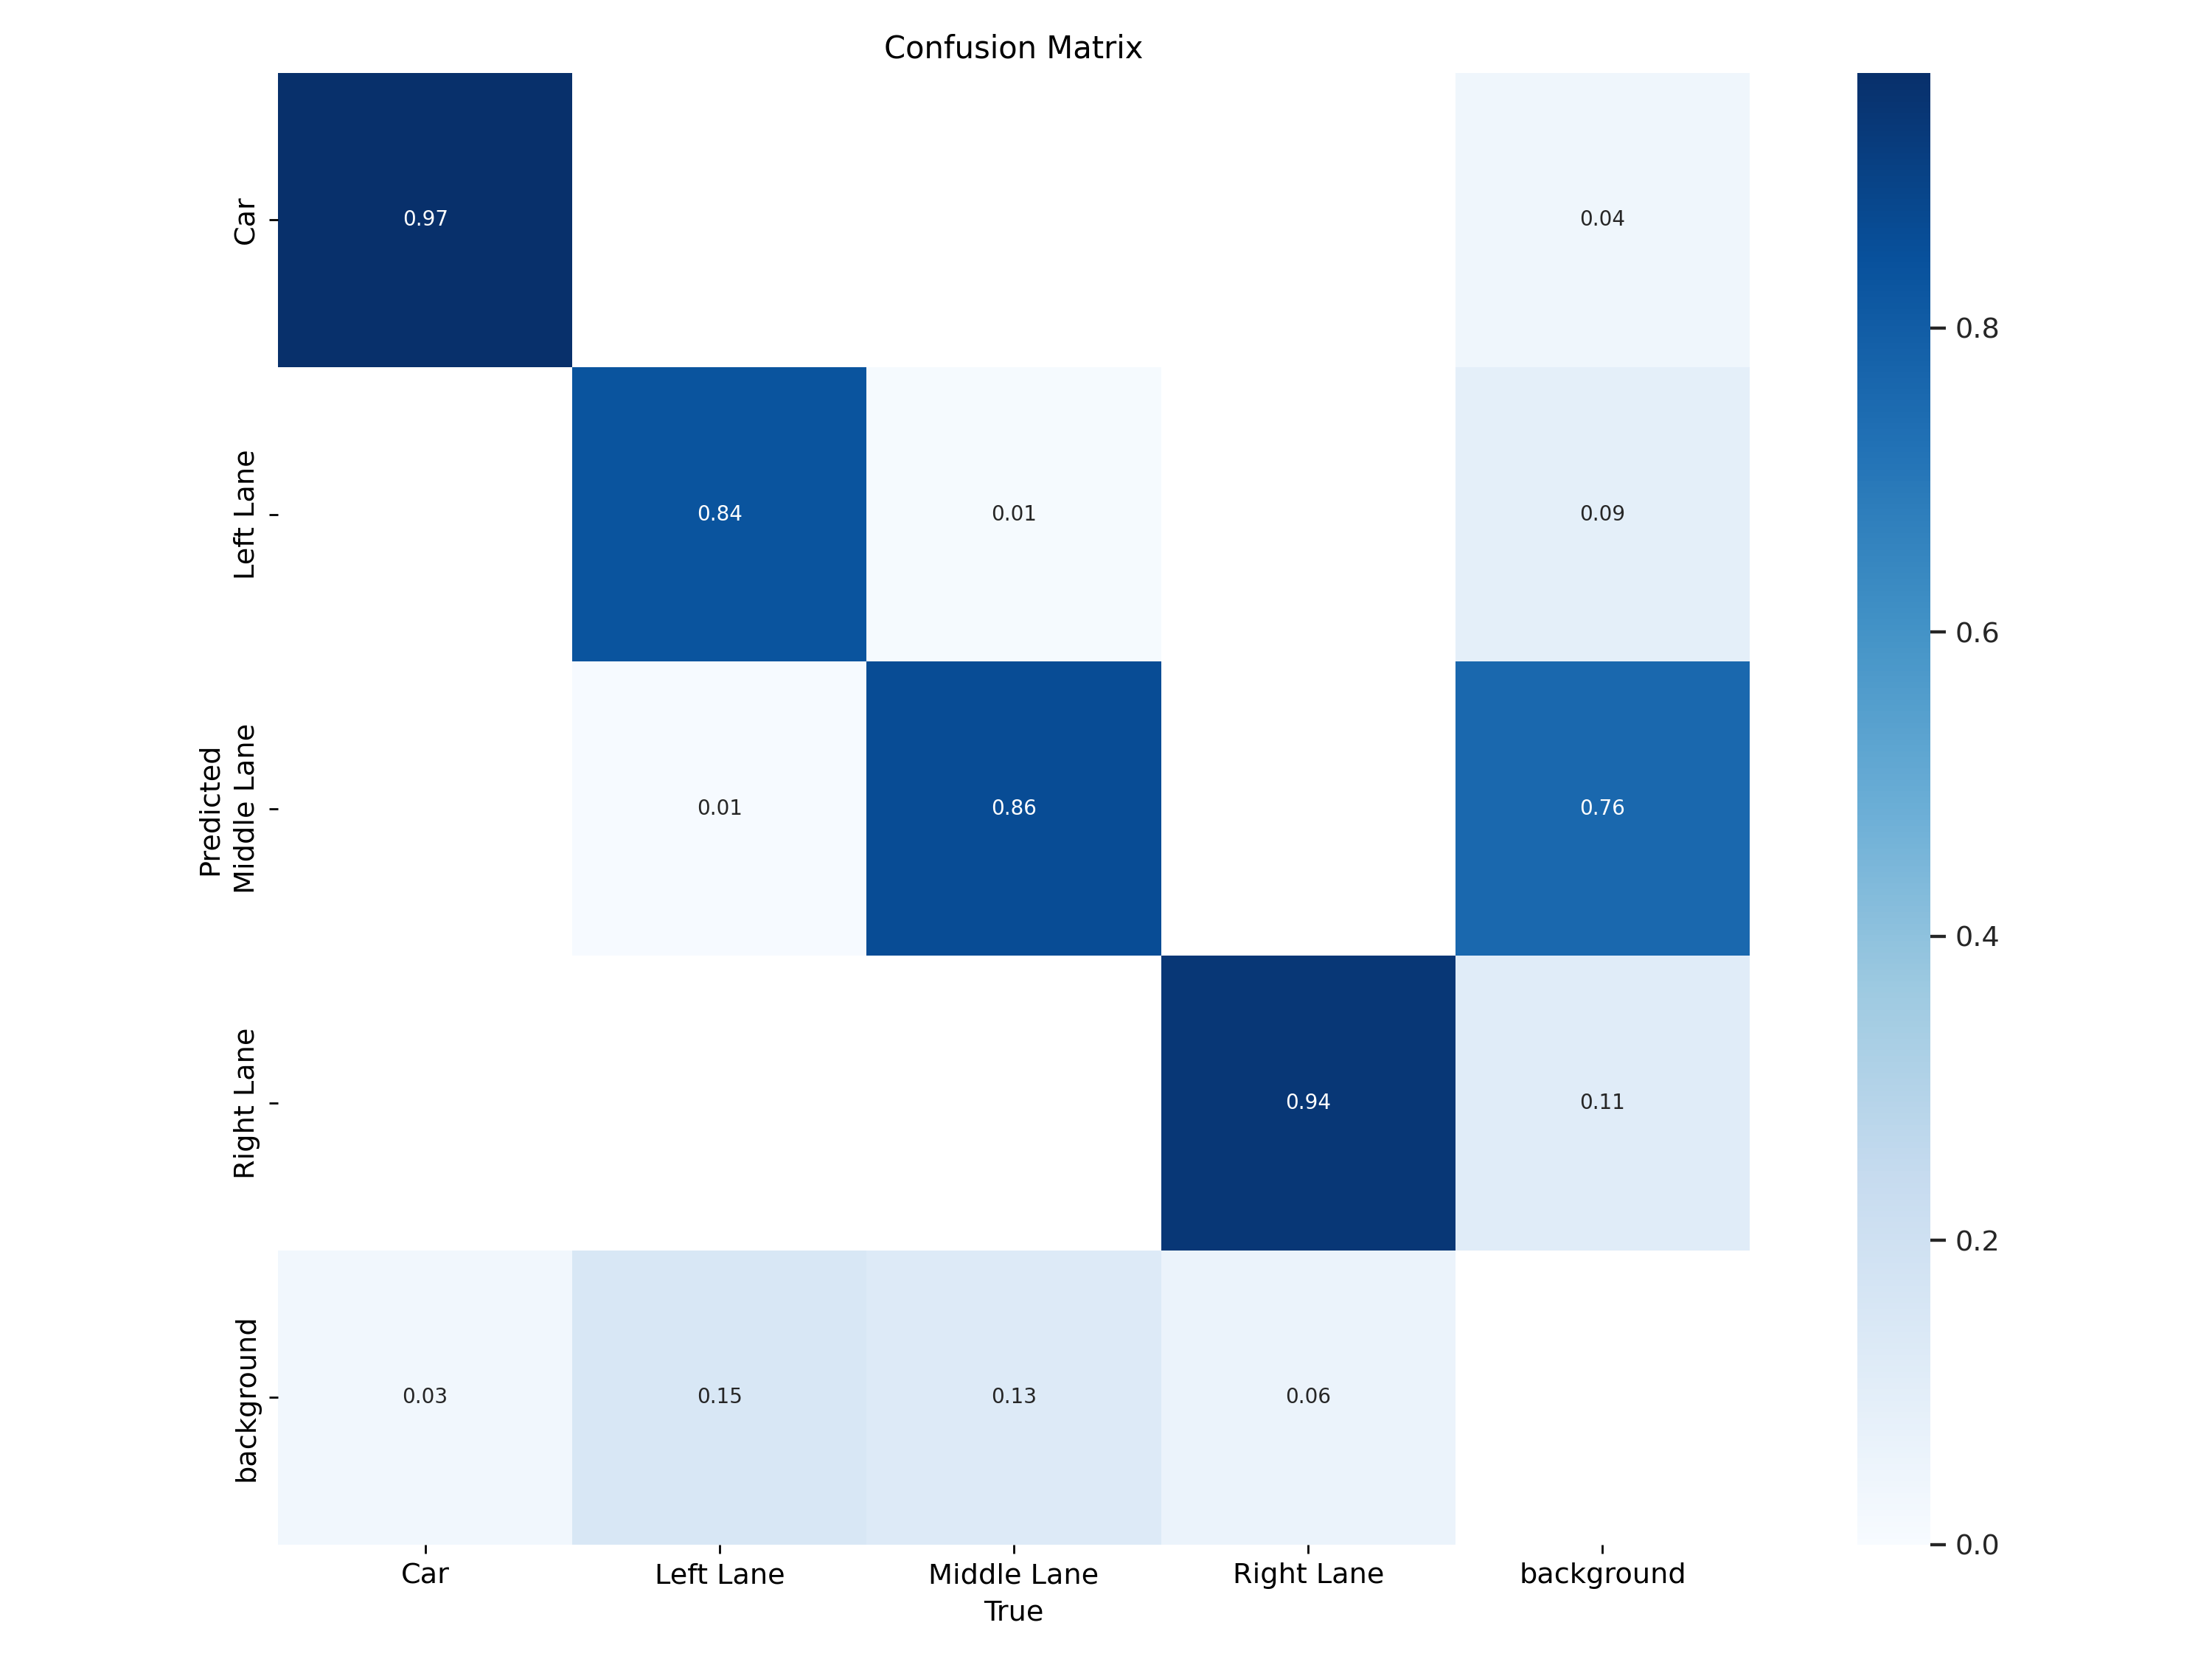

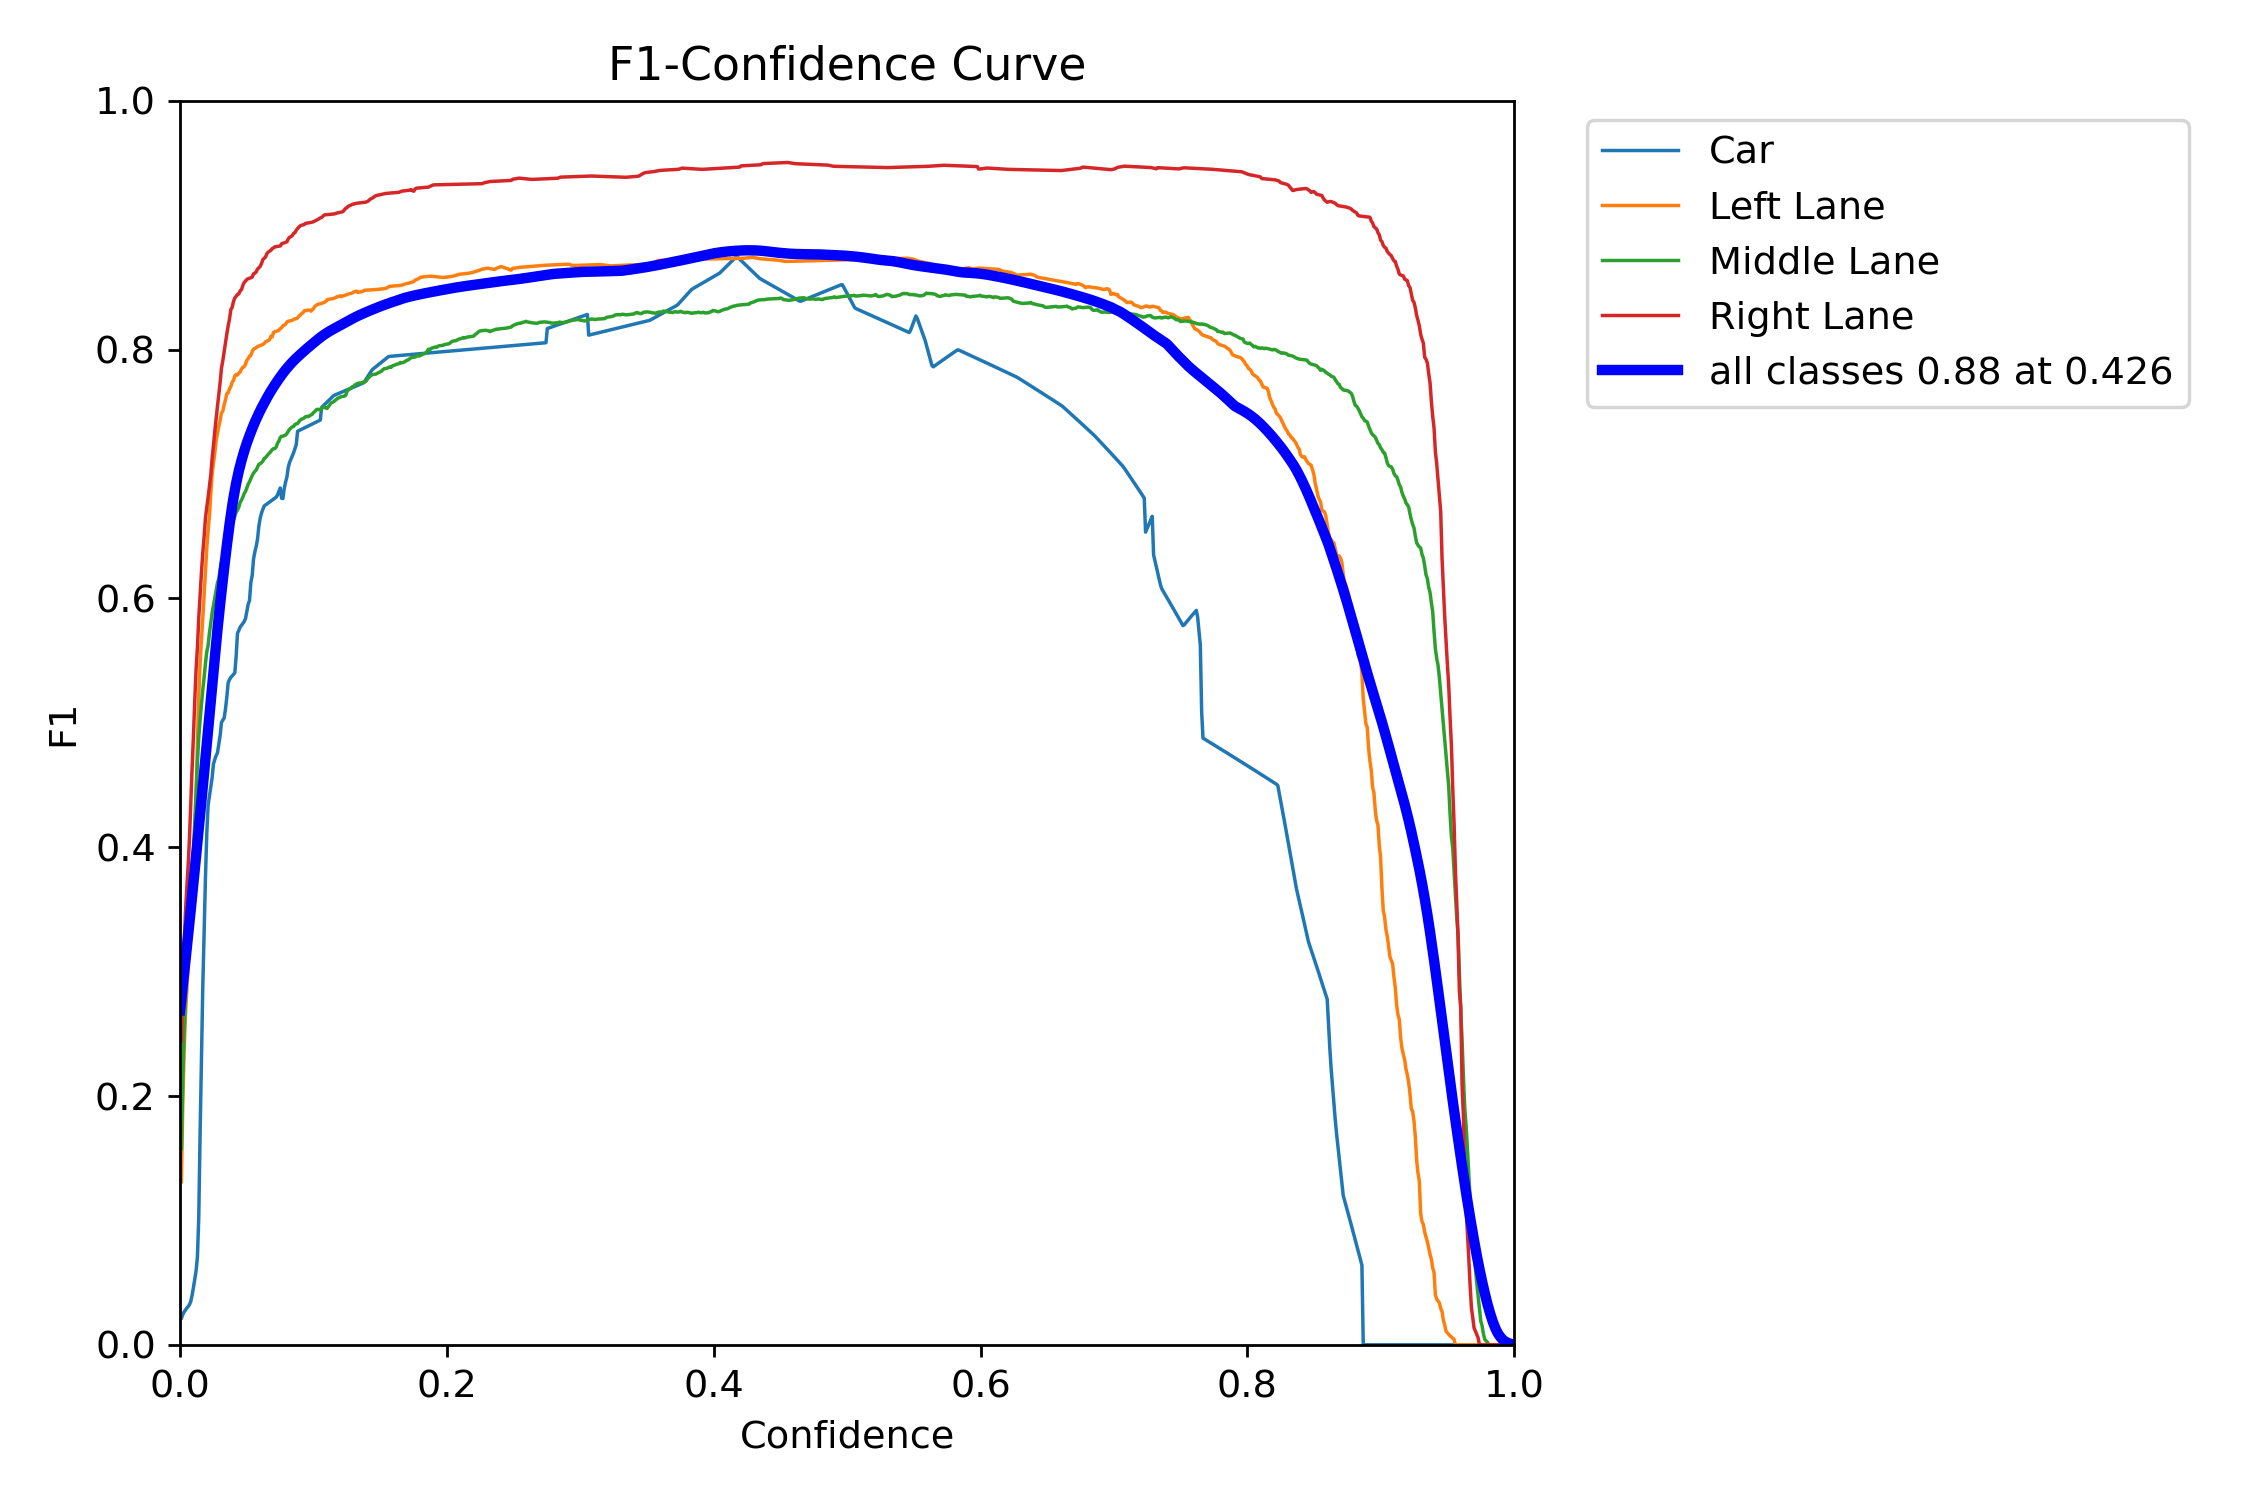

In [ ]:
from IPython.display import Image, display
import os

# Path to YOLOv3 results
results_dir = '/content/yolov5/runs/train/lane_detect_yolov3/'

plots = ['results.png', 'PR_curve.png', 'confusion_matrix.png', 'F1_curve.png']

print("Displaying YOLOv3 performance plots:")
for plot in plots:
    path = os.path.join(results_dir, plot)
    if os.path.exists(path):
        display(Image(filename=path))
    else:
        print(f"⚠ {plot} not found in {results_dir}")


In [ ]:
# DEBUG: Print all lines
for i, line in enumerate(lines):
    print(f"{i:02d}: {line.strip()}")


00: epoch,      train/box_loss,      train/obj_loss,      train/cls_loss,   metrics/precision,      metrics/recall,     metrics/mAP_0.5,metrics/mAP_0.5:0.95,        val/box_loss,        val/obj_loss,        val/cls_loss,               x/lr0,               x/lr1,               x/lr2
01: 0,            0.074054,            0.048772,            0.027192,             0.68202,              0.5311,             0.49007,             0.23576,            0.053446,            0.028969,            0.012272,            0.070182,           0.0033131,           0.0033131
02: 1,            0.057195,             0.03208,            0.010224,             0.59942,             0.54685,             0.48934,             0.26786,            0.054908,            0.023388,           0.0076188,            0.039743,           0.0062078,           0.0062078
03: 2,            0.049177,            0.027342,           0.0072278,             0.83185,             0.57372,             0.67539,             0.39776,      

In [ ]:
from IPython.display import Markdown

# Final YOLOv3 metrics (from last epoch, you can automate reading from CSV if needed)
precision = 0.92566
recall = 0.83249
map_50 = 0.90369
map_50_95 = 0.71085

# Estimated accuracy
estimated_accuracy = (precision + recall) / 2

# Display formatted results
output_md = f"""
### 📊 Final YOLOv3 Model Metrics (Epoch 14):

- 🔹 **Precision**       : `{precision:.4f}`
- 🔹 **Recall**          : `{recall:.4f}`
- 🔹 **mAP@0.5**         : `{map_50:.4f}`
- 🔹 **mAP@0.5:0.95**    : `{map_50_95:.4f}`
- ✅ **Estimated Accuracy**: `{estimated_accuracy:.4f}` (or `{estimated_accuracy*100:.2f}%`)
"""

Markdown(output_md)



### 📊 Final YOLOv3 Model Metrics (Epoch 14):

- 🔹 **Precision**       : `0.9257`
- 🔹 **Recall**          : `0.8325`
- 🔹 **mAP@0.5**         : `0.9037`
- 🔹 **mAP@0.5:0.95**    : `0.7108`  
- ✅ **Estimated Accuracy**: `0.8791` (or `87.91%`)


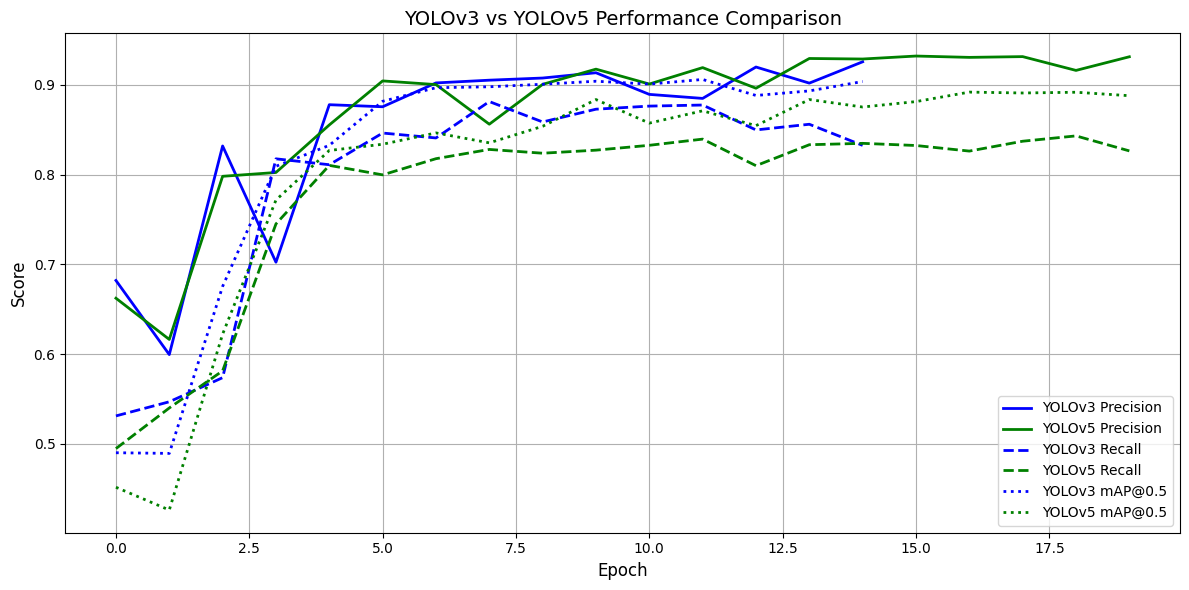

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load results
df_v3 = pd.read_csv('/content/yolov5/runs/train/lane_detect_yolov3/results.csv')
df_v5 = pd.read_csv('/content/yolov5/runs/train/lane_detect_yolov52/results.csv')

# Strip any accidental spaces in column names
df_v3.columns = [c.strip() for c in df_v3.columns]
df_v5.columns = [c.strip() for c in df_v5.columns]

# Plot comparison
plt.figure(figsize=(12, 6))

# Precision
plt.plot(df_v3['epoch'], df_v3['metrics/precision'], label='YOLOv3 Precision', color='blue', linewidth=2)
plt.plot(df_v5['epoch'], df_v5['metrics/precision'], label='YOLOv5 Precision', color='green', linewidth=2)

# Recall
plt.plot(df_v3['epoch'], df_v3['metrics/recall'], label='YOLOv3 Recall', linestyle='--', color='blue', linewidth=2)
plt.plot(df_v5['epoch'], df_v5['metrics/recall'], label='YOLOv5 Recall', linestyle='--', color='green', linewidth=2)

# mAP@0.5
plt.plot(df_v3['epoch'], df_v3['metrics/mAP_0.5'], label='YOLOv3 mAP@0.5', linestyle=':', color='blue', linewidth=2)
plt.plot(df_v5['epoch'], df_v5['metrics/mAP_0.5'], label='YOLOv5 mAP@0.5', linestyle=':', color='green', linewidth=2)

# Plot styling
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('YOLOv3 vs YOLOv5 Performance Comparison', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()

# Save and show
plt.savefig('/content/yolo_comparison.png')
plt.show()


In [ ]:
import os
import shutil

# Update this if path differs
base_yolo_dir = "/content/Lane-Detection-4"  # Should contain images/, labels/, data.yaml

images_dir = os.path.join(base_yolo_dir, "train", "images")
labels_dir = os.path.join(base_yolo_dir, "train", "labels")

# Output structure
lane_cnn_dir = "/content/cnn_dataset/train/lane"
not_lane_cnn_dir = "/content/cnn_dataset/train/not_lane"
os.makedirs(lane_cnn_dir, exist_ok=True)
os.makedirs(not_lane_cnn_dir, exist_ok=True)

# Process each label file
for label_file in os.listdir(labels_dir):
    if not label_file.endswith(".txt"):
        continue

    label_path = os.path.join(labels_dir, label_file)
    image_file = label_file.replace(".txt", ".jpg")
    image_path = os.path.join(images_dir, image_file)

    if not os.path.exists(image_path):
        image_file = image_file.replace(".jpg", ".png")  # fallback for .png
        image_path = os.path.join(images_dir, image_file)
        if not os.path.exists(image_path):
            continue

    with open(label_path, 'r') as f:
        lines = f.readlines()
    has_lane = any(line.startswith("1 ") for line in lines)

    if has_lane:
        shutil.copy(image_path, lane_cnn_dir)
    else:
        shutil.copy(image_path, not_lane_cnn_dir)

print("✅ Dataset ready: lane and not_lane images separated for CNN")



FileNotFoundError: [Errno 2] No such file or directory: '/content/Lane-Detection-4/train/labels'

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Paths to your dataset
train_dir = "/content/cnn_dataset/train"

# Image size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data generators with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# Build a simple CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (lane / not_lane)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_cnn_model.h5", save_best_only=True)

# Train
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stop, checkpoint]
)

# Save model
model.save("final_cnn_model.h5")

# Evaluate
loss, acc = model.evaluate(val_generator)
print(f"\n✅ Validation Accuracy: {acc:.4f}")
